<a href="https://colab.research.google.com/github/RupaliGarg0906/Learn_AI_ML/blob/master/SVHN_CNN_BASED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>SVHN Classification using CNNs</h1>

---



# Loading the Dataset

<h3>Import train and test sets of  SVHN dataset</h3>

In [83]:
#import required libraries
import h5py
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Convolution2D,Dropout,Dense,MaxPooling2D,Flatten,BatchNormalization,Activation
from keras import optimizers
from keras.callbacks import Early



In [7]:
#Mount the drive
from google.colab import drive
drive.mount('/gdrive')
drive.mount('/content/drive')
%ls

Mounted at /gdrive
Mounted at /content/drive
drive/  sample_data/


In [11]:
#Access the file and load it.
# Open the file as readonly

h5=h5py.File('/content/drive/My Drive/Colab Notebooks/Colab datasets/SVHN_single_grey1.h5','r')
X_train=h5['X_train'][:]
Y_train=h5['y_train'][:]
X_test=h5['X_test'][:]
Y_test=h5['y_test'][:]
h5.close()

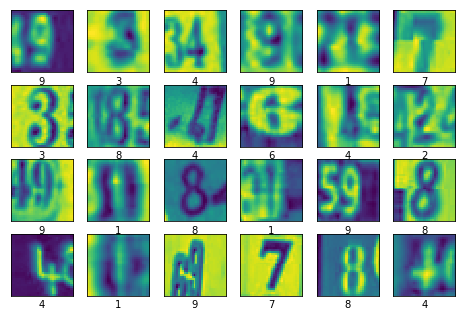

In [26]:
#Visualize the dataset with its actual labal
plt.figure(figsize=(8,8))
for i in range(1,25):
  n=randint(0,X_train.shape[0])
  plt.subplot(6,6,i)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X_train[n])
  plt.xlabel(Y_train[n])

In [38]:
def apply_crop(X):
  p,q,r=X.shape
  image_set=np.zeros((p,q,r),dtype=X.dtype)
  for i in range(0,p):
    cropped_image=X[i,:,8:25]
    image_set[i,:,8:25]=cropped_image
  return(image_set)



In [40]:
def OneHotEncoder(y):
  return(to_categorical(y))
  

In [64]:
#Apply crop image function
X_Train_Cropped=apply_crop(X_train)
X_Test_Cropped=apply_crop(X_test)

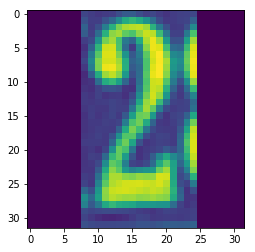

In [65]:
plt.imshow(X_Train_Cropped[0])

In [66]:
#Apply OneHotEncoder
Y_train_Encoded=OneHotEncoder(Y_train)
Y_test_Encoded=OneHotEncoder(Y_test)

Text(0.5,0.1,'Original Image Vs Cropped image')

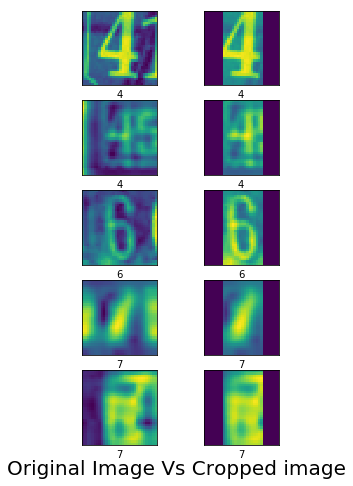

In [47]:
#Check original and its corresponding cropped image
fig=plt.figure(figsize=(4, 8))
rows=5
columns=2
for i in range(1,rows*columns+1,2):
  n=randint(0,420)
  m=randint(0,100)
  fig.add_subplot(rows, columns, i)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X_train[n*m])
  plt.xlabel(Y_train[n*m])
  fig.add_subplot(rows, columns, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X_Train_Cropped[n*m])
  plt.xlabel(Y_train[n*m])
fig.suptitle('Original Image Vs Cropped image',fontsize=20,y=0.1)

<h3>Reshape train and test sets into shapes compatible with tensorflow.keras models</h3>

<h4>tensorflow.keras expects data to be in the format (N_E.N_H,N_W,N_C)  N_E = Number of Examples, N_H = height, N_W = Width, N_C = Number of Channels.</h4>


In [67]:
# input image dimensions

# tensorflow.keras expects data to be in the format (N_E.N_H,N_W,N_C)
# N_E = Number of Examples, N_H = height, N_W = Width, N_C = Number of Channels.
img_rows, img_cols = 32, 32
X_Train_Cropped=X_Train_Cropped.reshape(X_Train_Cropped.shape[0],img_rows,img_cols,1)
X_Test_Cropped=X_Test_Cropped.reshape(X_Test_Cropped.shape[0],img_rows,img_cols,1)


<h3>Pre-processing the dataset</h3>
<h4>Normalizing the input</h4>

In [70]:
X_Train_Cropped = X_Train_Cropped.astype('float32')
X_Test_Cropped = X_Test_Cropped.astype('float32')

#Normalizing the input
X_Train_Cropped /= 255.0
X_Test_Cropped /= 255.0
print('X_train_cropped shape:', X_Train_Cropped.shape)
print(X_Train_Cropped.shape[0], 'train samples')
print(X_Test_Cropped.shape[0], 'test samples')


('X_train_cropped shape:', (42000, 32, 32, 1))
(42000, 'train samples')
(18000, 'test samples')


In [89]:
batch_size = 128
num_classes = 10
epochs = 12

# Building the CNN 

<h4>Define the layers of model</h4>  **5 Points**

In [76]:
model=Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(32,32,1)))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(Dense(10,kernel_initializer='he_normal'))
model.add(Activation('softmax'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# Training the CNN - 10 Points

<h4>Initializing the Tensorboard callback for visualization of training</h4>

In [82]:
import tensorflow as tf
Tensorflow_Callback=tf.keras.callbacks.TensorBoard(log_dir='/.logs')

<h4>Initializing Early stopping and Model chekpoint callbacks </h4>

In [91]:
ES=EarlyStopping(monitor='val_loss',min_delta=0.01,patience=3,mode='auto')


<h4>Fit the model to the dataset</h4>

In [96]:

model.fit(X_Train_Cropped,Y_train_Encoded,batch_size=batch_size,epochs=15,validation_data=(X_Test_Cropped,Y_test_Encoded),callbacks=[ES])

Train on 42000 samples, validate on 18000 samples
Epoch 1/15
42000/42000 [==============================] - 3s 62us/step - loss: 0.0416 - accuracy: 0.9859 - val_loss: 0.0532 - val_accuracy: 0.9823
Epoch 2/15
42000/42000 [==============================] - 2s 59us/step - loss: 0.0401 - accuracy: 0.9863 - val_loss: 0.0523 - val_accuracy: 0.9828
Epoch 3/15
42000/42000 [==============================] - 2s 59us/step - loss: 0.0383 - accuracy: 0.9868 - val_loss: 0.0513 - val_accuracy: 0.9832
Epoch 4/15
42000/42000 [==============================] - 3s 64us/step - loss: 0.0375 - accuracy: 0.9873 - val_loss: 0.0531 - val_accuracy: 0.9831


# Evaluating the CNN

In [97]:
#Evalue the model
model.evaluate(X_Test_Cropped,Y_test_Encoded)

18000/18000 [==============================] - 1s 75us/step


[0.053087817690852614, 0.9831165075302124]

Predicted valiue is 3
Actual valiue is 3


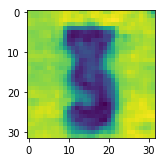

In [112]:
#Visualize 5 test set image predictions
predict=model.predict(X_Test_Cropped)
plt.figure(figsize=(8,8))
n=randint(0,X_Test_Cropped.shape[0])
plt.subplot(3,2,i)
print("Predicted valiue is {}".format(Y_test[n]))
print("Actual valiue is {}".format(predict[n].argmax()))
plt.imshow(X_test[n])




# Saving the CNN

In [116]:
#Save the trained weights and model in h5 files
model.save_weights("./weights_SVHN_CNN.h5")
model.save("./model_SVHN_CNN.h5")